Checkpoint 1 - Task 1: Introduction to Google Colab

In [ ]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
#read in file as dataframe
df = pd.read_csv('/content/twitter_data.csv', on_bad_lines='skip')

<ipython-input-4-612c3c5c00fa>:2: DtypeWarning: Columns (4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/twitter_data.csv', on_bad_lines='skip')


In [ ]:
#first five rows of dataframe
df.head()

,ItemID,Sentiment,SentimentSource,SentimentText,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,1,0,Sentiment140,is so sad for my APL frie...,NaN,NaN,NaN
1,2,0,Sentiment140,I missed the New Moon trail...,NaN,NaN,NaN
2,3,1,Sentiment140,omg its already 7:30 :O,NaN,NaN,NaN
3,4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I'...,NaN,NaN,NaN
4,5,0,Sentiment140,i think mi bf is cheating on me!!! ...,NaN,NaN,NaN


Task 2:Text Pre-processing

In [ ]:
#drop unnecessary columns (ItemID, SentimentSource)
df = df.drop(['ItemID', 'SentimentSource'], axis = 1)

In [ ]:
df.head()

,Sentiment,SentimentText
0,0,is so sad for my APL frie...
1,0,I missed the New Moon trail...
2,1,omg its already 7:30 :O
3,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,0,i think mi bf is cheating on me!!! ...


In [ ]:
#drop unnecessary columns (ItemID, SentimentSource)
df = df[['Sentiment', 'SentimentText']]

In [ ]:
! pip install nltk
import nltk

In [ ]:
#remove punctuation
import string
import re
df['SentimentText'] = df['SentimentText'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))

<ipython-input-13-aa493cf65fe0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SentimentText'] = df['SentimentText'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))


In [ ]:
df.head()

,Sentiment,SentimentText
0,0,is so sad for my APL friend
1,0,I missed the New Moon trailer
2,1,omg its already 730 O
3,0,Omgaga Im sooo im gunna CRy Ive be...
4,0,i think mi bf is cheating on me TT


In [ ]:
#remove stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
stop_words.add('http')
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
df['SentimentText'] = df['SentimentText'].apply(lambda x: remove_stopwords(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-15-e04c13f950b1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SentimentText'] = df['SentimentText'].apply(lambda x: remove_stopwords(x))


In [ ]:
#perform lower casing
df['SentimentText'] = df['SentimentText'].str.lower()

<ipython-input-16-56202f78b0a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SentimentText'] = df['SentimentText'].str.lower()


In [ ]:
df.head()

,Sentiment,SentimentText
0,0,sad apl friend
1,0,i missed new moon trailer
2,1,omg already 730 o
3,0,omgaga im sooo im gunna cry ive dentist since ...
4,0,think mi bf cheating tt


In [ ]:
#perform tokenization
nltk.download('punkt')
from nltk import punkt

df['SentimentText'] = df['SentimentText'].apply(nltk.word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
<ipython-input-18-7ae482ae3a82>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SentimentText'] = df['SentimentText'].apply(nltk.word_tokenize)


In [ ]:
df.head()

,Sentiment,SentimentText
0,0,"[sad, apl, friend]"
1,0,"[i, missed, new, moon, trailer]"
2,1,"[omg, already, 730, o]"
3,0,"[omgaga, im, sooo, im, gunna, cry, ive, dentis..."
4,0,"[think, mi, bf, cheating, tt]"


In [ ]:
df1 = df.copy()

In [ ]:
#perform stemming and lemmatizing
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

df['SentimentText'] = df['SentimentText'].apply(lambda sentence: [lemmatizer.lemmatize(stemmer.stem(word)) for word in sentence])

[nltk_data] Downloading package wordnet to /root/nltk_data...
<ipython-input-21-7d5c387cce52>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SentimentText'] = df['SentimentText'].apply(lambda sentence: [lemmatizer.lemmatize(stemmer.stem(word)) for word in sentence])


In [ ]:
df.head()

,Sentiment,SentimentText
0,0,"[sad, apl, friend]"
1,0,"[i, miss, new, moon, trailer]"
2,1,"[omg, alreadi, 730, o]"
3,0,"[omgaga, im, sooo, im, gunna, cri, ive, dentis..."
4,0,"[think, mi, bf, cheat, tt]"


Task 3: Exploratory Data Analysis

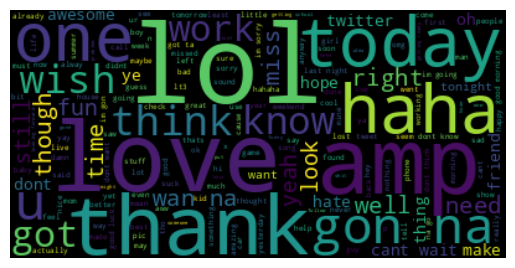

In [ ]:
#word cloud for overall dataset
import wordcloud
import matplotlib.pyplot as plt

common_words=''
for sen in df1['SentimentText']:
    common_words += " ".join(sen)+" "
wordcloud_ = wordcloud.WordCloud().generate(common_words)
plt.imshow(wordcloud_, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#separate word clouds for positive and negatuve sentiments
positive_sent_words=''
negative_sent_words=''
for i in range(len(df1['SentimentText'])):
    if df1['Sentiment'][i] == 0:
      negative_sent_words += " ".join(df1['SentimentText'][i])+" "
    else:
      positive_sent_words += " ".join(df1['SentimentText'][i])+" "
wordcloud_pos = wordcloud.WordCloud().generate(positive_sent_words)
wordcloud_neg = wordcloud.WordCloud().generate(negative_sent_words)

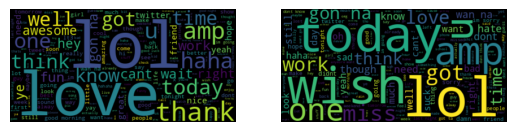

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
df1.shape

(1048575, 2)

<Axes: xlabel='Sentiment', ylabel='count'>

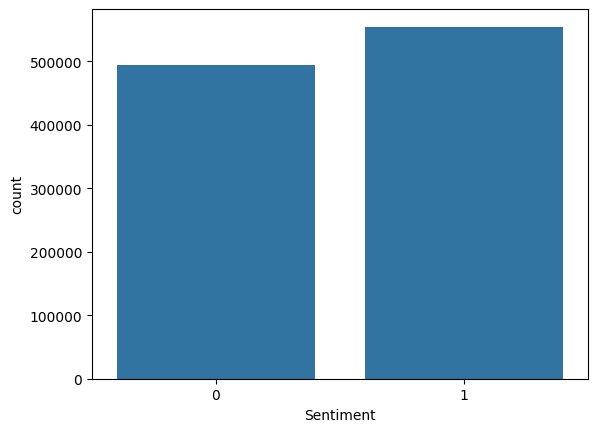

In [ ]:
#Countplot
import seaborn as sb

sb.countplot(x = df1['Sentiment'])

In [ ]:
#get length of each tweet
df1['SentimentText'] = df1['SentimentText'].apply(lambda a: len(a))
df1.head(10)

,Sentiment,SentimentText
0,0,3
1,0,5
2,1,4
3,0,17
4,0,5
5,0,2
6,1,2
7,0,6
8,1,5
9,1,3


In [ ]:
#get longest tweet for both sentiments
positive_df = df1['SentimentText'].loc[(df1['Sentiment']==1)]
print(max(positive_df))
print(len(positive_df))

68
554470


In [ ]:
negative_df = df1['SentimentText'].loc[(df1['Sentiment']==0)]
print(max(negative_df))
print(len(negative_df))

85
494105


<Axes: xlabel='Sentiment', ylabel='SentimentText'>

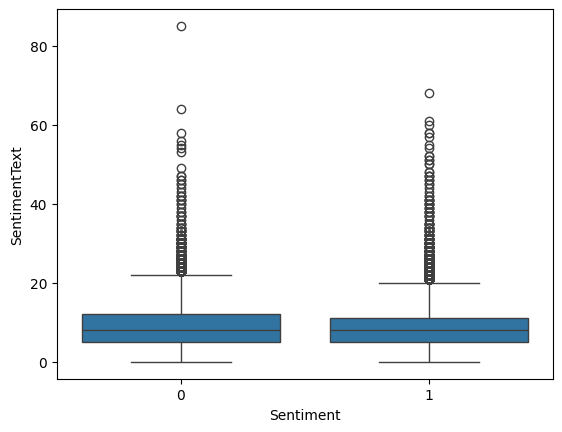

In [ ]:
sb.boxplot(x = 'Sentiment', y = 'SentimentText', data = df1)
#not much difference in the lengths

Checkpoint 2 - Task 1: LSTM Model

In [ ]:
df2 = df.copy()

# Encoded the target column
from sklearn.preprocessing import LabelEncoder

lb=LabelEncoder()
df2['Sentiment'] = lb.fit_transform(df2['Sentiment'])

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=500, split=' ')
tokenizer.fit_on_texts(df2['SentimentText'].values)
X = tokenizer.texts_to_sequences(df2['SentimentText'].values)
X = pad_sequences(X)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split

model = Sequential()
model.add(Embedding(500, 120, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 120)           60000     
                                                                 
 spatial_dropout1d (Spatial  (None, 40, 120)           0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 176)               209088    
                                                                 
 dense (Dense)               (None, 2)                 354       
                                                                 
Total params: 269442 (1.03 MB)
Trainable params: 269442 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
#Splitting the data into training and testing
y=pd.get_dummies(df2['Sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [ ]:
batch_size=32
model.fit(X_train, y_train, epochs = 3, batch_size=batch_size, verbose = 'auto')

  545/17267 [..............................] - ETA: 47:37 - loss: 0.5182 - accuracy: 0.7400

In [ ]:
model.evaluate(X_test,y_test)

Task 2: Word2Vec Embeddings

In [ ]:
#Word2Vec Embeddings
!pip install gensim
import gensim

W2V_SIZE = 300
W2V_WINDOW = 7
W2V_EPOCH = 32
W2V_MIN_COUNT = 10
w2v_model = gensim.models.word2vec.Word2Vec(size=W2V_SIZE,
                                            window=W2V_WINDOW,
                                            min_count=W2V_MIN_COUNT,
                                            workers=8)


w2v_model.build_vocab(df2['SentimentText'])

In [ ]:
w2v_model.train(df2['SentimentText'], total_examples=len(df2['SentimentText']), epochs=W2V_EPOCH)

Task 3: Logistic Regression

In [ ]:
df3 = df.copy()

from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer()
bag = count.fit_transform(df3['SentimentText'])

count.vocabulary_

In [ ]:
bag.toarray()

In [ ]:
import numpy as np

from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer(use_idf=True,
                         norm='l2',
                         smooth_idf=True)

np.set_printoptions(precision=2)

# Feed the tf-idf transformer with our previously created Bag of Words
tfidf.fit_transform(bag).toarray()

In [ ]:
from sklearn.model_selection import train_test_split

# split the dataset in train and test
X = df3['SentimentText']
y = df3['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        preprocessor=None)

param_grid = [{'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'vect__preprocessor': [None, preprocessor],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0]},
              {'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'vect__preprocessor': [None, preprocessor],
               'vect__use_idf':[False],
               'vect__norm':[None],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0]},
              ]

lr_tfidf = Pipeline([('vect', tfidf),
                     ('clf', LogisticRegression(random_state=0))])

gs_lr_tfidf = GridSearchCV(lr_tfidf, param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

In [ ]:
gs_lr_tfidf.fit(X_train, y_train)

In [ ]:
print('Best parameter set: ' + str(gs_lr_tfidf.best_params_))
print('Best accuracy: %.3f' % gs_lr_tfidf.best_score_)

In [ ]:
clf = gs_lr_tfidf.best_estimator_
print('Accuracy in test: %.3f' % clf.score(X_test, y_test))

In [ ]:
import pickle
import os

pickle.dump(clf, open(os.path.join('data', 'logisticRegression.pkl'), 'wb'), protocol=4)

Task 4: Test

In [ ]:
#read in file as dataframe
df_test = pd.read_csv('/content/drive/MyDrive/WiDS/test.csv', error_bad_lines = False)

<ipython-input-4-1af6648d7731>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_test = pd.read_csv('/content/drive/MyDrive/WiDS/test.csv', error_bad_lines = False)


In [ ]:
df_test.head()

,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets
0,5.270000e+17,Tue Oct 28 00:02:57 +0000 2014,Please God I pray that this game is at LEAST e...,1.052122e+09,177,687,3066,8133,0
1,8.170000e+17,Thu Jan 05 21:05:02 +0000 2017,@adclaidekanes .......unless taylor maybe want...,3.249600e+09,235,185,24407,22302,0
2,5.930000e+17,Wed Apr 29 12:48:22 +0000 2015,Great day for a game of quidditch. Looks like ...,2.766067e+09,78,175,664,1148,0
3,5.600000e+17,Wed Jan 28 00:38:37 +0000 2015,Just started week three and I am absolutely lo...,2.217881e+08,155,355,130,5479,0
4,5.930000e+17,Mon Apr 27 16:14:45 +0000 2015,Some of the Most Common Effects of Stress | |...,1.616997e+09,475,1235,0,21533,0


In [ ]:
df_test = df_test['post_text']